<a href="https://colab.research.google.com/github/Captmoonshot/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Sammy%20Lee%20-%20Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


### Here I'm doing some exploratory data analysis

In [87]:
df.dtypes

make              int64
price           float64
body              int64
mileage           int64
engV            float64
engType           int64
registration      int64
year              int64
drive             int64
dtype: object

In [88]:
df.isna().sum()

make            0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
drive           0
dtype: int64

In [89]:
df.shape

(8495, 9)

In [90]:
df.describe()

,make,price,body,mileage,engV,engType,registration,year,drive
count,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000
mean,46.535491,16185.453305,2.302295,141.744202,2.568337,1.650618,0.941613,2006.500883,0.575868
std,24.526251,24449.641512,1.610307,97.464062,5.387238,1.341282,0.234488,6.925907,0.741235
min,0.000000,259.350000,0.000000,0.000000,0.100000,0.000000,0.000000,1959.000000,0.000000
25%,23.000000,5490.000000,1.000000,74.000000,1.600000,0.000000,1.000000,2004.000000,0.000000
50%,50.000000,9500.000000,3.000000,130.000000,2.000000,1.000000,1.000000,2008.000000,0.000000
75%,68.000000,17145.600000,3.000000,197.000000,2.500000,3.000000,1.000000,2011.000000,1.000000
max,82.000000,547800.000000,5.000000,999.000000,99.990000,3.000000,1.000000,2016.000000,2.000000


In [91]:
df['registration'].value_counts()

1    7999
0     496
Name: registration, dtype: int64

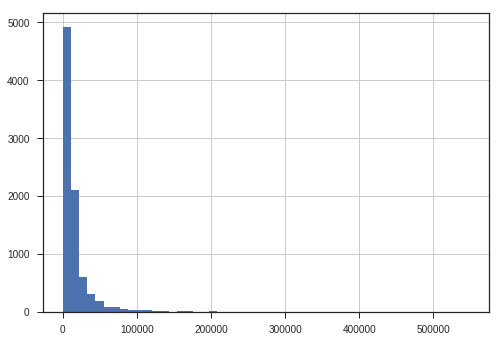

In [92]:
df['price'].hist(bins=50)

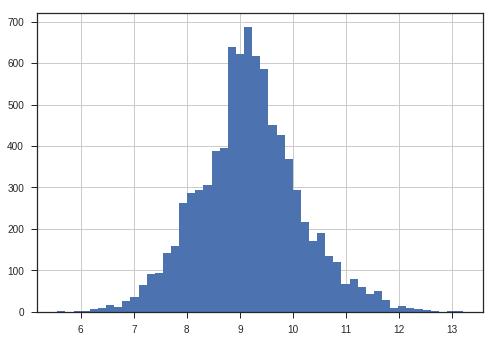

In [93]:
price_logged = np.log(df['price'])
price_logged.hist(bins=50)
df['price_logged'] = price_logged

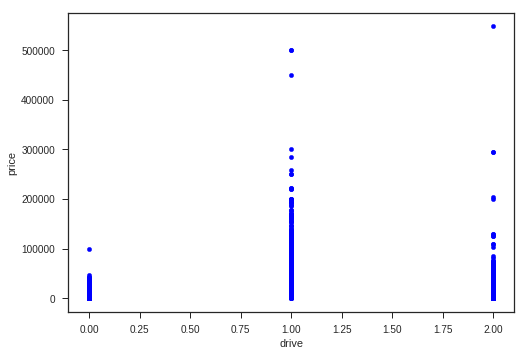

In [94]:
df.plot.scatter(x='drive', y='price', c='blue')

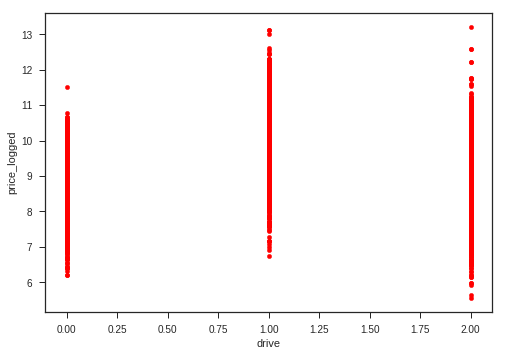

In [95]:
df.plot.scatter(x='drive', y='price_logged', c='red')

In [96]:
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,price_logged
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [97]:
df.columns

Index(['make', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'price_logged'],
      dtype='object')

In [98]:
X = df[['make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive']].values
y = df['price'].values

print(X[:5])
print()
print(y[:5])

[[2.300e+01 0.000e+00 6.800e+01 2.500e+00 1.000e+00 1.000e+00 2.010e+03
  1.000e+00]
 [5.000e+01 3.000e+00 1.730e+02 1.800e+00 1.000e+00 1.000e+00 2.011e+03
  2.000e+00]
 [5.000e+01 2.000e+00 1.350e+02 5.500e+00 3.000e+00 1.000e+00 2.008e+03
  2.000e+00]
 [5.000e+01 5.000e+00 1.620e+02 1.800e+00 0.000e+00 1.000e+00 2.012e+03
  0.000e+00]
 [5.500e+01 0.000e+00 8.300e+01 2.000e+00 3.000e+00 1.000e+00 2.013e+03
  1.000e+00]]

[15500. 20500. 35000. 17800. 16600.]


## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [0]:
LinReg = LinearRegression().fit(X_train, y_train)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [101]:
print("Coefficients:\n", LinReg.coef_)
print()
print("Intercept:", LinReg.intercept_)

Coefficients:
 [  -33.80914554 -1721.02501098   -39.96352172   272.10204943
 -1085.33344434  4487.51810936  1145.2506681   8462.04541339]

Intercept: -2278702.1490454725


## 1.5 Use the test data to make predictions

In [102]:
y_pred = LinReg.predict(X_test)

print("Some predictions:\n", y_pred[:5])

Some predictions:
 [19194.45968216  5367.93233327 26151.89784368 12431.42128975
 24798.22996019]


## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [103]:
print("R^2 on Test Set: {:.2f}".format(LinReg.score(X_test, y_test)))
print()
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

R^2 on Test Set: 0.30

RMSE: 20338.84


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

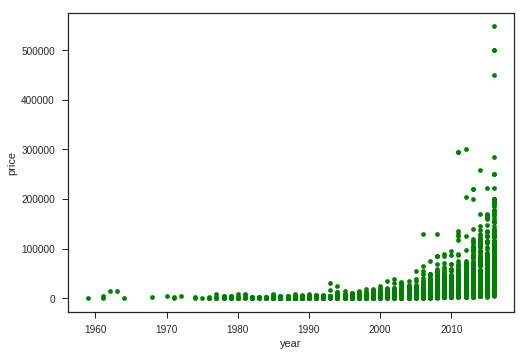

In [104]:
df.plot.scatter(x='year', y='price', c='green')

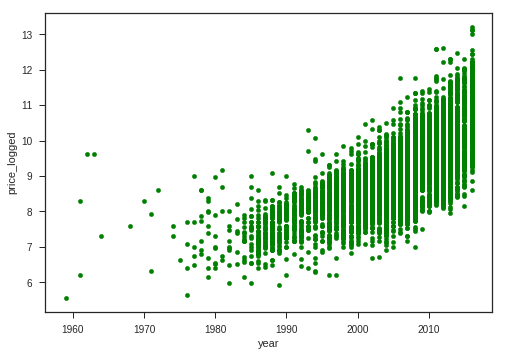

In [105]:
df.plot.scatter(x='year', y='price_logged', c='green')

### Answer: The 'year' coefficient should be interpreted as "every increase in year by one year, price increases by around $1145".

## 1.8 How should we interpret the Root-Mean-Square Error?

### Answer: The MSE (Mean Squared Error) is a measure of the vertical spread of the data.  RMSE (Root Mean Squared Error) is the square root of the MSE, and so it's like the standard deviation of the unexplained variance in y in the same units as the y or the dependent variable.

## 1.9 How should we interpret the $R^2$?

### Answer: R^2 or the Coefficient of Determination is the square of r (Pearson's correlation coefficient).  It always ranges from 0 to 1.  And it shows the percentage variation in y which is explained by all the X variables together.  It is a "measure of the goodness of fit".  The downside of R^2 is that the number always goes up with the increase in the number of features, so it doesn't necessarily tell us how good the explanatory variables are individually as predictors.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

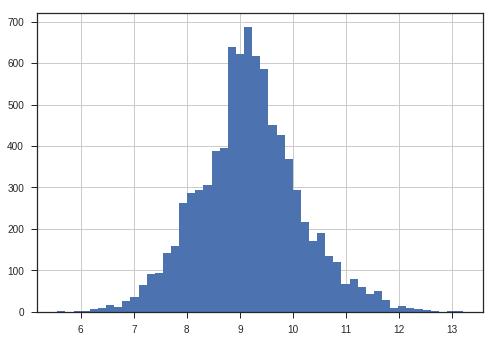

In [106]:
price_logged = np.log(df['price'])

price_logged.hist(bins=50)

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

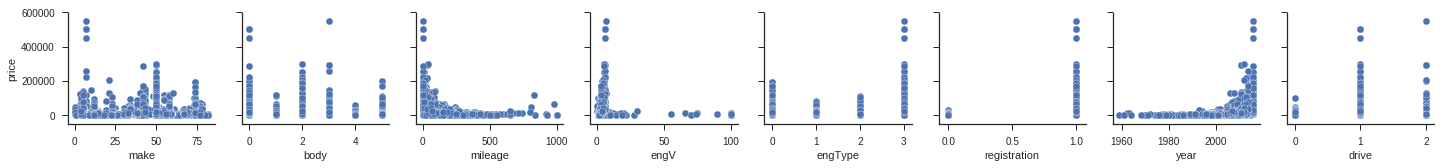

In [107]:
##### Your Code Here #####
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
df_columns = df.columns.drop(['price', 'price_logged'])

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=df, y_vars=['price'], x_vars=df_columns)

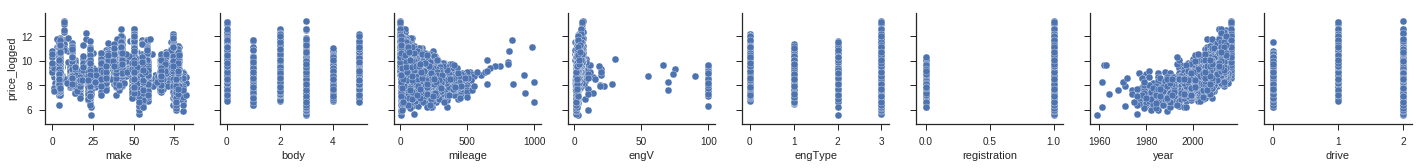

In [108]:
#### Same as above except using price_logged instead of price ####


sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
df_columns = df.columns.drop(['price', 'price_logged'])

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=df, y_vars=['price_logged'], x_vars=df_columns)

## 2.3 If appropriate, create any polynomial features. 

In [109]:
# The 'year' variable looks like a prime candidate for polynomial features

df['year_squared'] = df['year']**2


df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,price_logged,year_squared
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595,4040100
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180,4044121
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103,4032064
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954,4048144
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158,4052169


## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [117]:
X = df[['make', 'body', 'mileage', 'engV', 'engType', 'registration',
        'drive','year', 'year_squared']].values
y = df['price_logged'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

LinReg2 = LinearRegression().fit(X_train, y_train)

y_pred = LinReg2.predict(X_test)

print('Coefficients:\n', LinReg2.coef_)
print()
print('Intercept: ', LinReg2.intercept_)
print()
print('R^2 for Test set: {:.2f}'.format(LinReg2.score(X_test, y_test)))
print()
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

Coefficients:
 [-1.58780120e-03 -9.04554791e-02  6.84115159e-04  8.38817792e-03
 -4.88819193e-02  6.68632563e-01  3.79037603e-01 -6.09456487e+00
  1.54762612e-03]

Intercept:  6006.4389287175945

R^2 for Test set: 0.67

RMSE: 0.56


In [122]:
# Use Statsmodels to run a regression

X = df[['make', 'body', 'mileage', 'engV', 'engType', 'registration',
        'drive','year', 'year_squared']]
y = df['price_logged']


# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           price_logged   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1948.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:50:38   Log-Likelihood:                -6964.2
No. Observations:                8495   AIC:                         1.395e+04
Df Residuals:                    8485   BIC:                         1.402e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6418.6476    324.059     19.807   

In [123]:
df['year_square_root'] = np.sqrt(df['year'])
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,price_logged,year_squared,year_square_root
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595,4040100,44.833024
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180,4044121,44.844175
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103,4032064,44.810713
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954,4048144,44.855323
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158,4052169,44.866469


In [127]:
X = df[['make', 'body', 'mileage', 'engV', 'engType', 'registration',
        'drive','year', 'year_square_root']]
y = df['price_logged']


# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           price_logged   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1947.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:07:28   Log-Likelihood:                -6964.7
No. Observations:                8495   AIC:                         1.395e+04
Df Residuals:                    8485   BIC:                         1.402e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.614e+04   1293.515  

In [128]:
X = df[['make', 'body', 'mileage', 'engV', 'engType', 'registration',
        'drive','year', 'year_square_root']].values
y = df['price_logged'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

LinReg2 = LinearRegression().fit(X_train, y_train)

y_pred = LinReg2.predict(X_test)

print('Coefficients:\n', LinReg2.coef_)
print()
print('Intercept: ', LinReg2.intercept_)
print()
print('R^2 for Test set: {:.2f}'.format(LinReg2.score(X_test, y_test)))
print()
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

Coefficients:
 [-1.58708352e-03 -9.04673821e-02  6.82496884e-04  8.38623314e-03
 -4.89112899e-02  6.68656377e-01  3.79089073e-01  1.24346583e+01
 -1.10360044e+03]

Intercept:  24493.009641679233

R^2 for Test set: 0.67

RMSE: 0.56


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

### Answer: "A one unit increase in year will result in the increase in  a percentage increase in price equal to the coefficient for year which in this case is (-6.50). "  However when I run the regression again using the square root of the year instead of year squared above, the model doesn't improve in terms of R^2 or RMSE, but I get a coefficient where the sign flips on the year coefficient."


# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

### Answer: The Gradient Descent seeks to minimize the SSE (sum of squared errors) which is the sum of the difference between predictions and actual y-values squared.

## 3.2 What is the "Learning Rate" and what is its function?

### Answer: The Learning Rate determines how fast the Gradient Descent tries to minimize the cost function, in other words how big our steps our towards finding the global minimum of MSE of our data.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [134]:
X = df[['make', 'body', 'mileage', 'engV', 'engType', 'registration',
        'drive','year', 'year_squared']]
y = df['price_logged']


X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           price_logged   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1870.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:27:07   Log-Likelihood:                -6964.2
No. Observations:                8495   AIC:                         1.395e+04
Df Residuals:                    8485   BIC:                         1.402e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6418.6476    624.441     10.279   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['make', 'body', 'mileage', 'engV', 'engType', 'registration',
        'drive','year', 'year_squared']]

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'drive',
       'year', 'year_squared'],
      dtype='object') 


[4.872366393174108, 3.5263666834182184, 4.842736615172757, 1.2387469265764588, 2.870517349756317, 18.703709581546015, 1.8133725889353451, 125856.9098246065, 124958.67476207382]


In [132]:
X.corr()

,make,body,mileage,engV,engType,registration,drive,year,year_squared
make,1.000000,0.026127,-0.035097,-0.021246,-0.011880,0.104557,-0.196444,-0.013833,-0.013679
body,0.026127,1.000000,0.287060,-0.025320,-0.184007,-0.082643,-0.162235,-0.154554,-0.154919
mileage,-0.035097,0.287060,1.000000,0.042081,-0.229644,-0.229354,0.067962,-0.503135,-0.504345
engV,-0.021246,-0.025320,0.042081,1.000000,-0.004896,-0.015274,0.084756,-0.041076,-0.041024
engType,-0.011880,-0.184007,-0.229644,-0.004896,1.000000,0.152988,-0.044859,-0.040471,-0.040323
registration,0.104557,-0.082643,-0.229354,-0.015274,0.152988,1.000000,-0.055793,0.185104,0.185613
drive,-0.196444,-0.162235,0.067962,0.084756,-0.044859,-0.055793,1.000000,-0.169709,-0.169444
year,-0.013833,-0.154554,-0.503135,-0.041076,-0.040471,0.185104,-0.169709,1.000000,0.999995
year_squared,-0.013679,-0.154919,-0.504345,-0.041024,-0.040323,0.185613,-0.169444,0.999995,1.000000


### Answer: A VIF > 10 indicates collinearity problems with the varible and you can do a correlation matrix to figure out which features have high correlations with each other and drop them.  

### My model shows high VIF for 'year' and 'year _squared', but the two variables are obviously related by design so that's not what I would deem a collinearity problem.

### The other variable with very high VIF around 18 is the "registration" variable, and when I run correlation matrix it shows that "registration" is highly correlated with "mileage".  

### Let's see what happens if we do drop the "registration" variable.

In [136]:
X = df[['make', 'body', 'mileage', 'engV', 'engType',
        'drive','year', 'year_square_root']].values
y = df['price_logged'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

LinReg3 = LinearRegression().fit(X_train, y_train)

y_pred = LinReg3.predict(X_test)

print('Coefficients:\n', LinReg3.coef_)
print()
print('Intercept: ', LinReg3.intercept_)
print()
print('R^2 for Test set: {:.2f}'.format(LinReg3.score(X_test, y_test)))
print()
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

Coefficients:
 [-9.73784994e-04 -9.08886059e-02  5.71940936e-04  8.23734639e-03
 -3.35507252e-02  3.76549790e-01  1.44586971e+01 -1.28438933e+03]

Intercept:  28530.61032000063

R^2 for Test set: 0.65

RMSE: 0.58


### As expected there's no improvement from dropping the "Registration" variable. 

### Ignore below I'm just experimenting with different feature engineering.

In [139]:
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,price_logged,year_squared,year_square_root
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595,4040100,44.833024
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180,4044121,44.844175
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103,4032064,44.810713
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954,4048144,44.855323
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158,4052169,44.866469


In [140]:
df['mileage_and_registration'] = df['mileage'] * df['registration']
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,price_logged,year_squared,year_square_root,mileage_and_registration
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595,4040100,44.833024,68
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180,4044121,44.844175,173
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103,4032064,44.810713,135
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954,4048144,44.855323,162
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158,4052169,44.866469,83


In [147]:
X = df[['make', 'body', 'mileage', 'engV', 'engType', 'registration',
        'drive','year', 'year_square_root', 'mileage_and_registration']].values
y = df['price_logged'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

LinReg3 = LinearRegression().fit(X_train, y_train)

y_pred = LinReg3.predict(X_test)

print('Coefficients:\n', LinReg3.coef_)
print()
print('Intercept: ', LinReg3.intercept_)
print()
print('R^2 for Test set: {:.2f}'.format(LinReg3.score(X_test, y_test)))
print()
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

Coefficients:
 [-1.59903290e-03 -9.06202593e-02  4.13782654e-05  8.36662892e-03
 -4.90743242e-02  5.12535560e-01  3.79370628e-01  1.25289268e+01
 -1.11202191e+03  6.75405287e-04]

Intercept:  24681.242704985503

R^2 for Test set: 0.67

RMSE: 0.56


In [143]:
df['mileage_poly'] = df['mileage'].replace(0, 1)
df['mileage_poly'].head(20)

0      68
1     173
2     135
3     162
4      83
5     199
6     185
7     146
8     125
9       1
10    190
11    164
12    159
13    290
14      2
15      1
16     83
17     57
18      1
19      2
Name: mileage_poly, dtype: int64

In [148]:
X = df[['make', 'body', 'mileage', 'engV', 'engType',
        'drive','year', 'year_square_root', 'registration', 'mileage_and_registration', 'mileage_poly']].values
y = df['price_logged'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

LinReg3 = LinearRegression().fit(X_train, y_train)

y_pred = LinReg3.predict(X_test)

print('Coefficients:\n', LinReg3.coef_)
print()
print('Intercept: ', LinReg3.intercept_)
print()
print('R^2 for Test set: {:.2f}'.format(LinReg3.score(X_test, y_test)))
print()
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

Coefficients:
 [-1.63983617e-03 -8.86684135e-02 -3.62551010e-01  8.15696520e-03
 -4.65176306e-02  3.76226165e-01  1.06719611e+01 -9.46070902e+02
  5.05302617e-01  7.75374385e-04  3.62544148e-01]

Intercept:  20973.633705846816

R^2 for Test set: 0.67

RMSE: 0.56


In [145]:
df_dummy = pd.get_dummies(df, prefix=['registration'], columns=['registration'])
df_dummy.head()

,make,price,body,mileage,engV,engType,year,drive,price_logged,year_squared,year_square_root,mileage_and_registration,mileage_poly,registration_0,registration_1
0,23,15500.0,0,68,2.5,1,2010,1,9.648595,4040100,44.833024,68,68,0,1
1,50,20500.0,3,173,1.8,1,2011,2,9.928180,4044121,44.844175,173,173,0,1
2,50,35000.0,2,135,5.5,3,2008,2,10.463103,4032064,44.810713,135,135,0,1
3,50,17800.0,5,162,1.8,0,2012,0,9.786954,4048144,44.855323,162,162,0,1
4,55,16600.0,0,83,2.0,3,2013,1,9.717158,4052169,44.866469,83,83,0,1


In [150]:
X = df_dummy[['make', 'body', 'mileage', 'engV', 'engType',
        'drive','year', 'year_square_root', 'mileage_and_registration', 'mileage_poly', 'registration_0',
       'registration_1']].values
y = df_dummy['price_logged'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

LinReg3 = LinearRegression().fit(X_train, y_train)

y_pred = LinReg3.predict(X_test)

print('Coefficients:\n', LinReg3.coef_)
print()
print('Intercept: ', LinReg3.intercept_)
print()
print('R^2 for Test set: {:.2f}'.format(LinReg3.score(X_test, y_test)))
print()
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

Coefficients:
 [-1.63983617e-03 -8.86684135e-02 -3.62551010e-01  8.15696520e-03
 -4.65176306e-02  3.76226165e-01  1.06719611e+01 -9.46070902e+02
  7.75374385e-04  3.62544148e-01 -2.52651309e-01  2.52651309e-01]

Intercept:  20973.886357151605

R^2 for Test set: 0.67

RMSE: 0.56


In [0]:
# Some extra feature engineering and some more interaction variables slightly increased R^2 and decreased RMSE.
# I suspect removing outliers also would improve accuracy metrics and model diagnostics